In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt   
import seaborn as sns
from scipy.stats import zscore

In [2]:
Bank_df=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheetname='Data')

In [3]:
Bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
Bank_df.shape

(5000, 14)

In [5]:
temp_df= Bank_df




In [6]:
Bank_df['Mortgage_Binary'] = Bank_df['Mortgage'].map(lambda x: 1 if x > 0 else 0)
Bank_df['Mortgage_Binary'].value_counts()
Bank_df=Bank_df.drop(['ID', 'ZIP Code','Mortgage'], axis=1)
#Bank_df['Mortgage_Binary'][Bank_df.Mortgage >0]=1
#Bank_df['Mortgage_Binary'][Bank_df.Mortgage==0]=0

In [7]:
#Bank_df['Personal Loan']=Bank_df['Personal Loan'].astype('category')
#Bank_df['Education']=Bank_df['Education'].astype('category')
#Bank_df['Securities Account']=Bank_df['Securities Account'].astype('category')
#Bank_df['CD Account']=Bank_df['CD Account'].astype('category')
#Bank_df['Online']=Bank_df['Online'].astype('category')
#Bank_df['CreditCard']=Bank_df['CreditCard'].astype('category')
#Bank_df['Mortgage_Binary']=Bank_df['Mortgage_Binary'].astype('category')
Bank_df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Mortgage_Binary         int64
dtype: object

In [8]:
Bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


temp_df.describe().transpose()

In [9]:
Bank_df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Mortgage_Binary         int64
dtype: object

In [10]:
Bank_df[~Bank_df.applymap(np.isreal).all(1)]

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_Binary


In [11]:
Bank_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

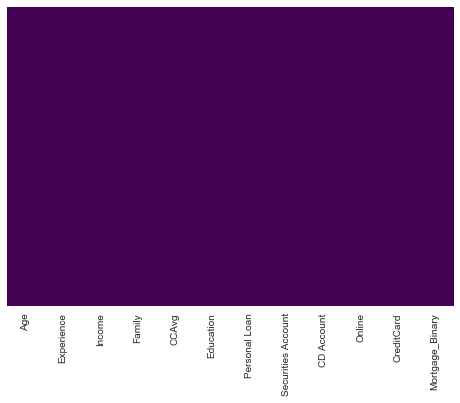

In [12]:
sns.heatmap(Bank_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
Bank_df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_Binary
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.007726,-0.000436,0.008043,0.013702,0.007681,-0.009545
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.007413,-0.001232,0.010353,0.013898,0.008967,-0.008499
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.003688
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,0.061367,0.019994,0.014110,0.010354,0.011588,0.005037
CCAvg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.366891,0.015087,0.136537,-0.003620,-0.006686,-0.011394
Education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,0.136722,-0.010812,0.013934,-0.015004,-0.011014,-0.000505
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,1.000000,0.021954,0.316355,0.006278,0.002802,0.029940
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,0.021954,1.000000,0.317034,0.012627,-0.015028,-0.002221
CD Account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.316355,0.317034,1.000000,0.175880,0.278644,0.040212
Online,0.013702,0.013898,0.014206,0.010354,-0.003620,-0.015004,0.006278,0.012627,0.175880,1.000000,0.004210,-0.004310


In [14]:
Bank_df.corr()["Personal Loan"]

Age                  -0.007726
Experience           -0.007413
Income                0.502462
Family                0.061367
CCAvg                 0.366891
Education             0.136722
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Mortgage_Binary       0.029940
Name: Personal Loan, dtype: float64

In [15]:
abc1= pd.crosstab(Bank_df['Education'], Bank_df['Personal Loan'], margins= True)
abc1

Personal Loan,0,1,All
Education,,,
1,2003,93,2096
2,1221,182,1403
3,1296,205,1501
All,4520,480,5000


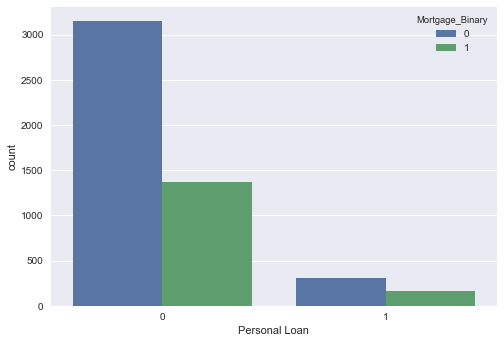

In [16]:
sns.countplot(x="Personal Loan", hue= "Mortgage_Binary", data=Bank_df)

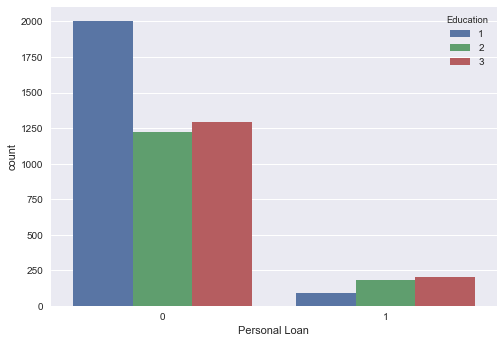

In [17]:
sns.countplot(x="Personal Loan", hue= "Education", data=Bank_df)

In [18]:
abc2= pd.crosstab(Bank_df['Securities Account'], Bank_df['Personal Loan'], margins= True)
abc2

Personal Loan,0,1,All
Securities Account,,,
0,4058,420,4478
1,462,60,522
All,4520,480,5000


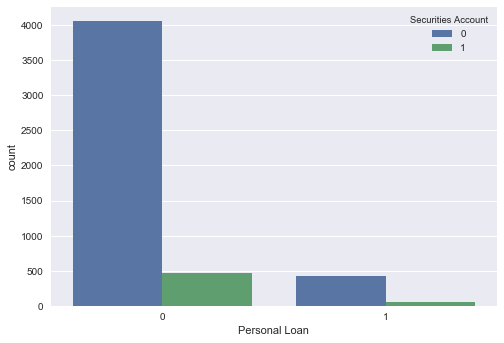

In [19]:
sns.countplot(x="Personal Loan", hue= "Securities Account", data=Bank_df)

In [20]:
abc3= pd.crosstab(Bank_df['CD Account'], Bank_df['Personal Loan'], margins= True)
abc3

Personal Loan,0,1,All
CD Account,,,
0,4358,340,4698
1,162,140,302
All,4520,480,5000


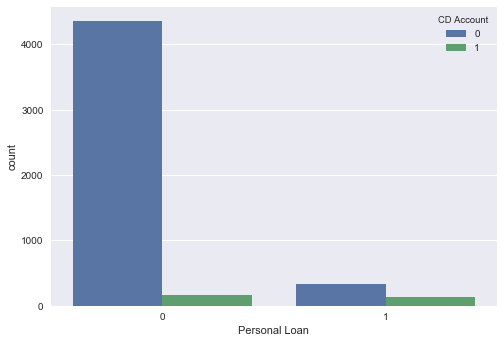

In [21]:
sns.countplot(x="Personal Loan", hue= "CD Account", data=Bank_df)

In [22]:
abc4= pd.crosstab(Bank_df['Online'], Bank_df['Personal Loan'], margins= True)
abc4

Personal Loan,0,1,All
Online,,,
0,1827,189,2016
1,2693,291,2984
All,4520,480,5000


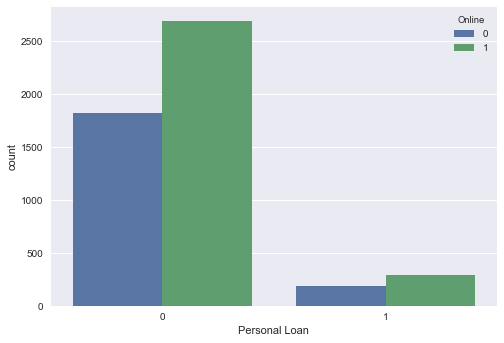

In [23]:
sns.countplot(x="Personal Loan", hue= "Online", data=Bank_df)

In [24]:
abc5= pd.crosstab(Bank_df['CreditCard'], Bank_df['Personal Loan'], margins= True)
abc5

Personal Loan,0,1,All
CreditCard,,,
0,3193,337,3530
1,1327,143,1470
All,4520,480,5000


In [25]:
abc5= pd.crosstab(Bank_df['CreditCard'], Bank_df['Mortgage_Binary'], margins= True)
abc5

Mortgage_Binary,0,1,All
CreditCard,,,
0,2439,1091,3530
1,1023,447,1470
All,3462,1538,5000


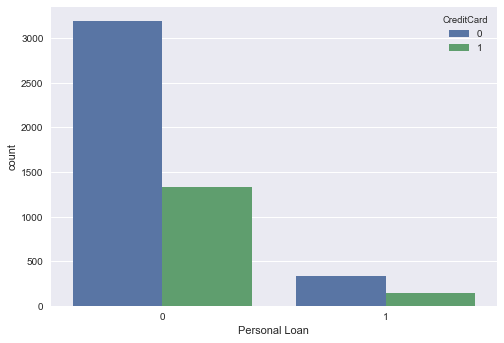

In [26]:
sns.countplot(x="Personal Loan", hue= "CreditCard", data=Bank_df)

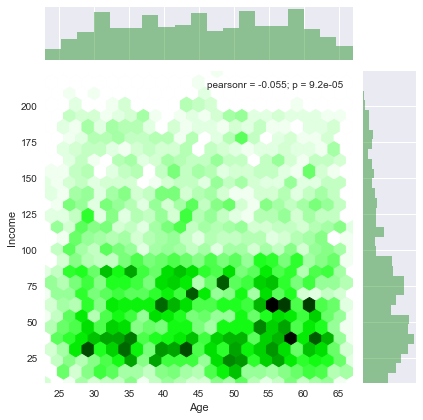

In [27]:
sns.jointplot(x='Age',y='Income',data=Bank_df,kind='hex',color='green')

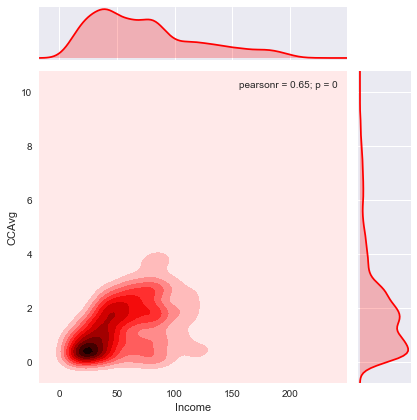

In [28]:
sns.jointplot(x='Income',y='CCAvg',data=Bank_df,color='red',kind='kde');

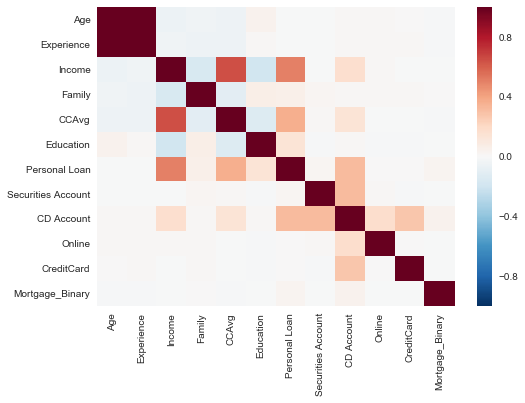

In [29]:
sns.heatmap(Bank_df.corr())

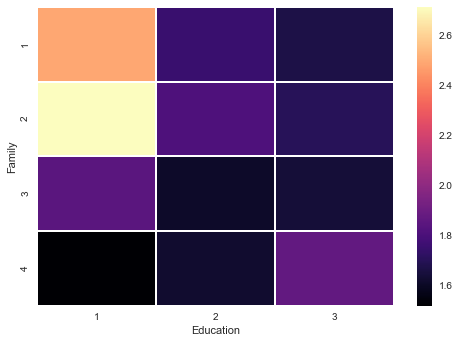

In [30]:
pv = Bank_df.pivot_table(values='CCAvg',index='Family',columns='Education')
sns.heatmap(pv,cmap='magma',linecolor='white',linewidths=1)

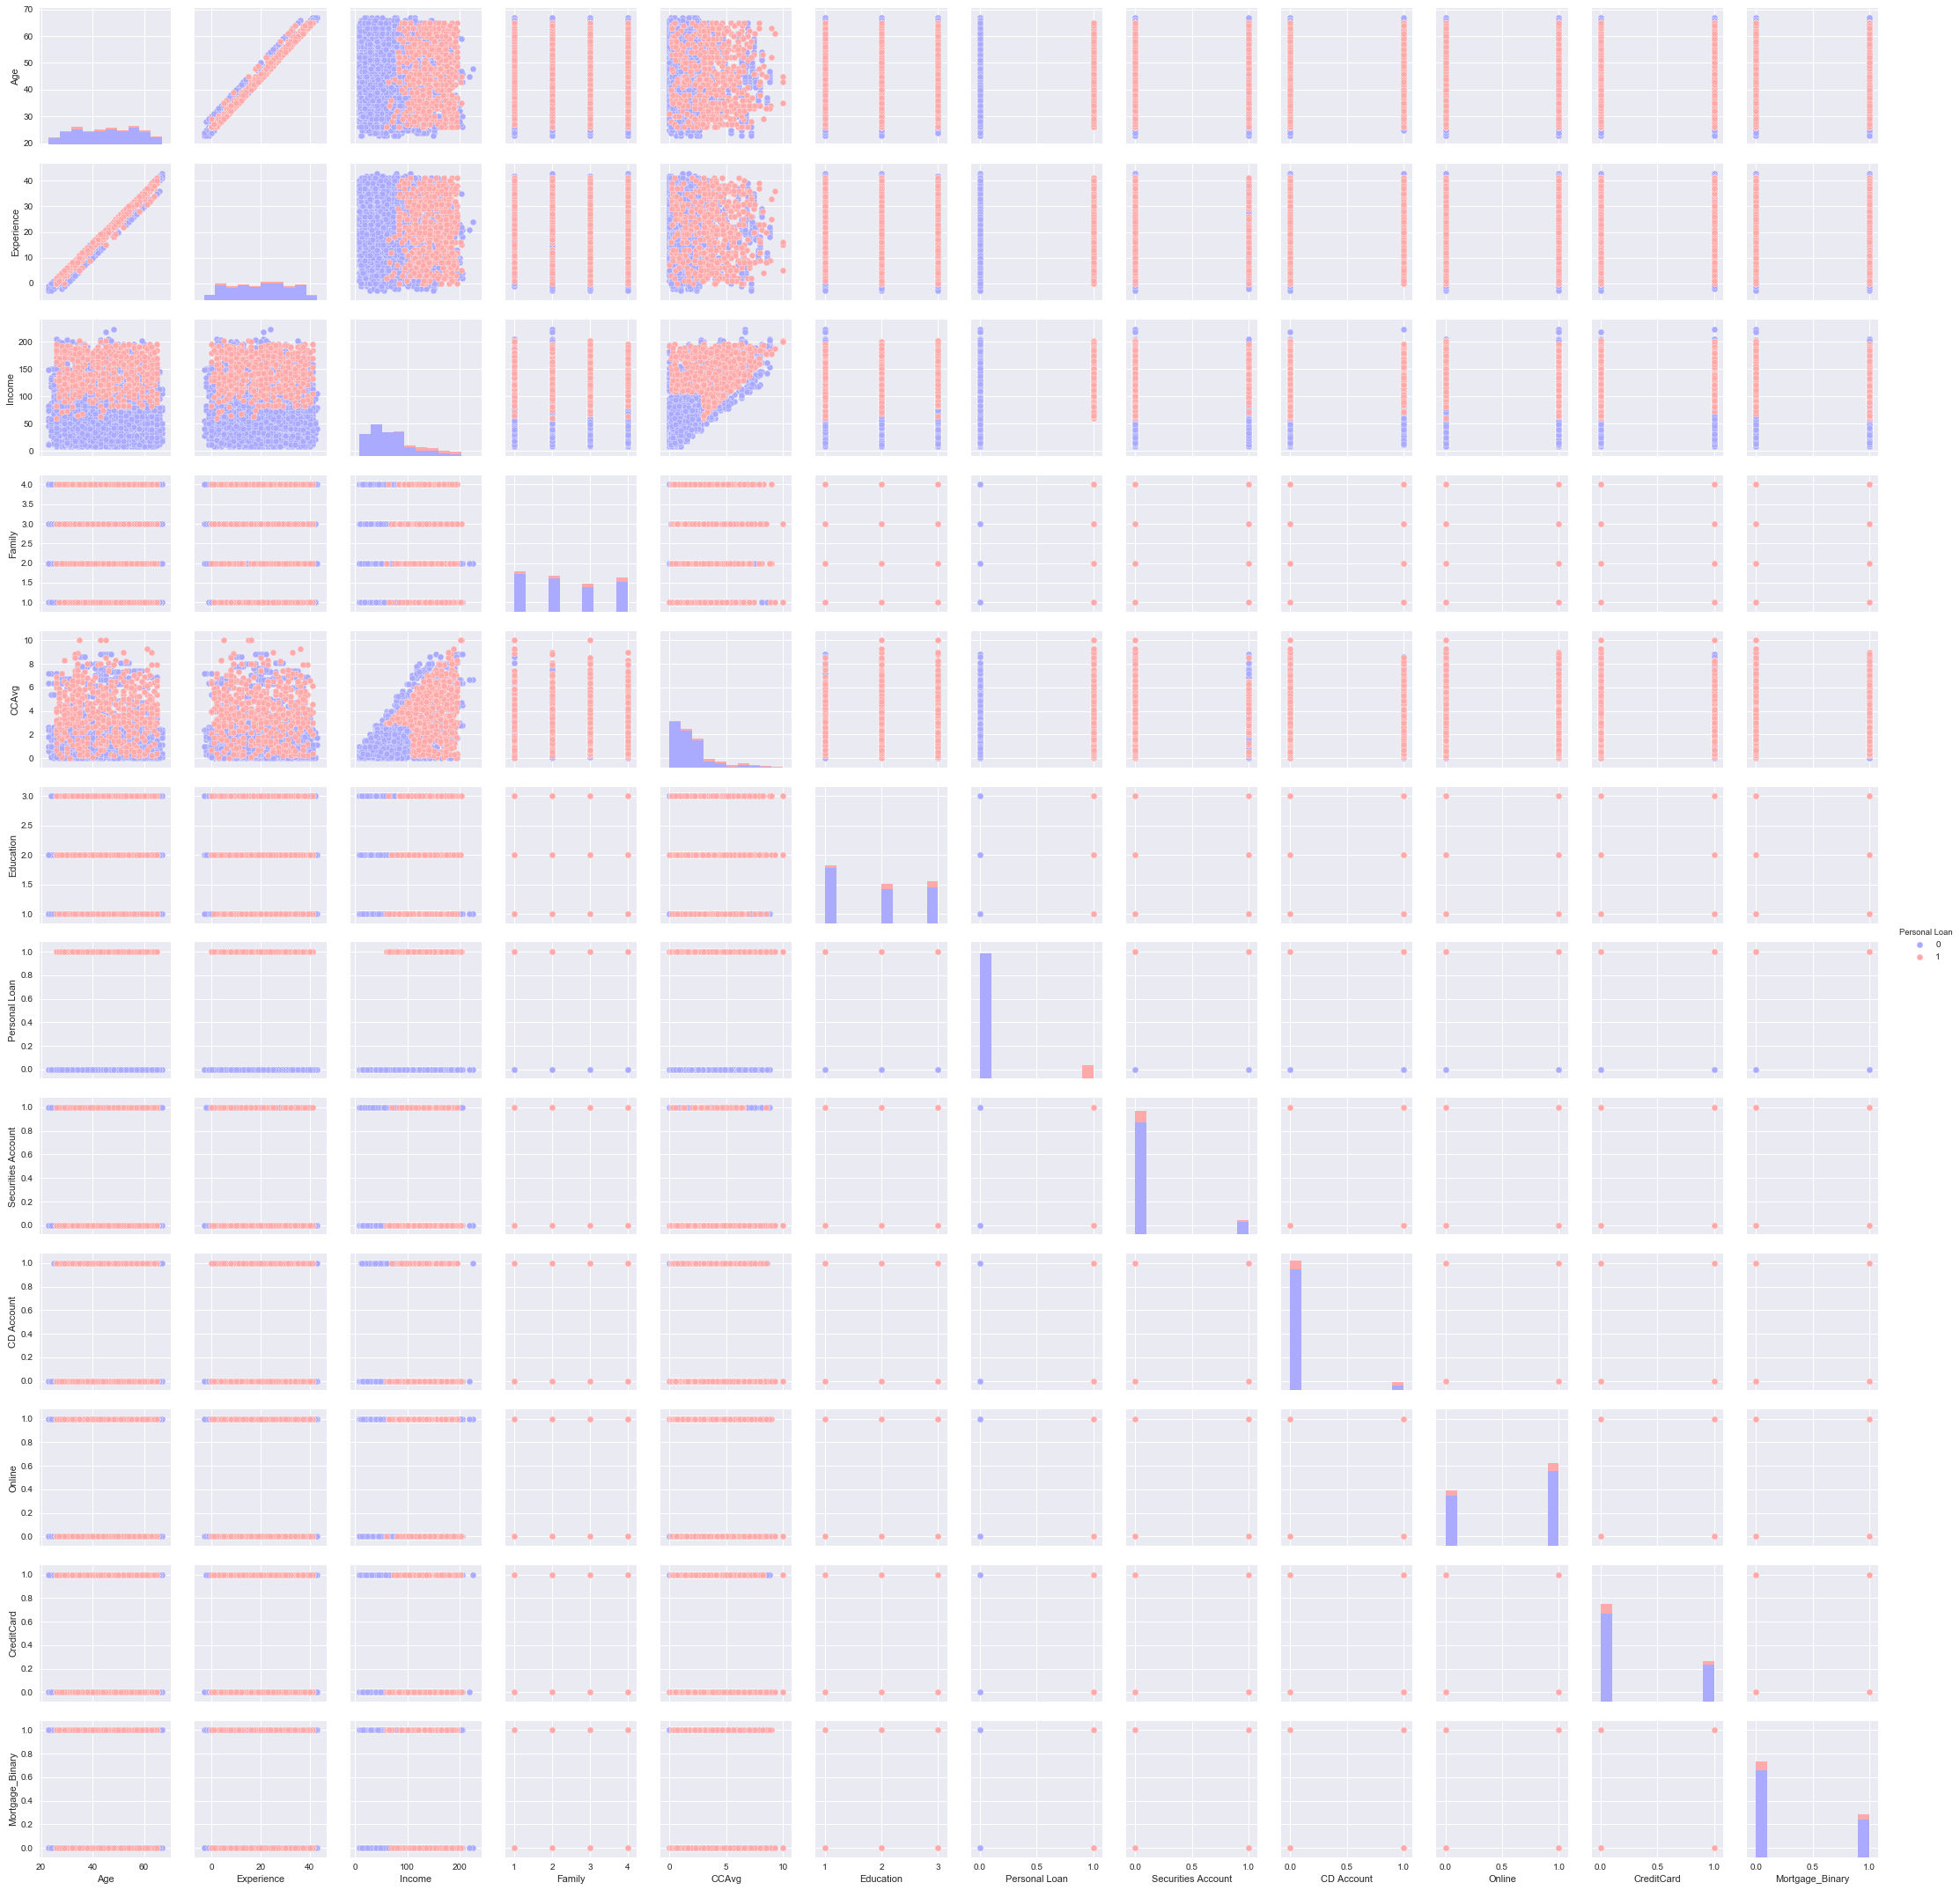

In [31]:
sns.pairplot(Bank_df,hue='Personal Loan',palette='bwr')

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = Bank_df[['Income','Family','CCAvg','Education','Securities Account','CD Account','Online','Mortgage_Binary']]
y = Bank_df['Personal Loan']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1343
          1       0.84      0.55      0.67       157

avg / total       0.94      0.94      0.94      1500



In [40]:
logmodel.score(X_test, y_test)

0.94266666666666665

In [41]:
print(confusion_matrix(y_test,predictions))

[[1327   16]
 [  70   87]]
